# INFO 6105 Project : Online Shopper Intention

#### Siddharth Bahekar - 002417718
#### Rachita Shah - 002482615

In [13]:
# Data Analysis and visualization tools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Reading Database
data = pd.read_csv('online_shoppers_intention.csv')

# shape of the data(number of rows vs number of column)
data.shape

(12330, 18)

In [17]:
type(data)

pandas.core.frame.DataFrame

In [19]:
# Displaying some rows of the data
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [21]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [23]:
# Null data checking 
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [25]:
# missing percentage of the data
missing_percentage = data.isnull().sum()/data.shape[0]
print(missing_percentage)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64


In [27]:
# description of the data
data.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

## Correlation Heatmap

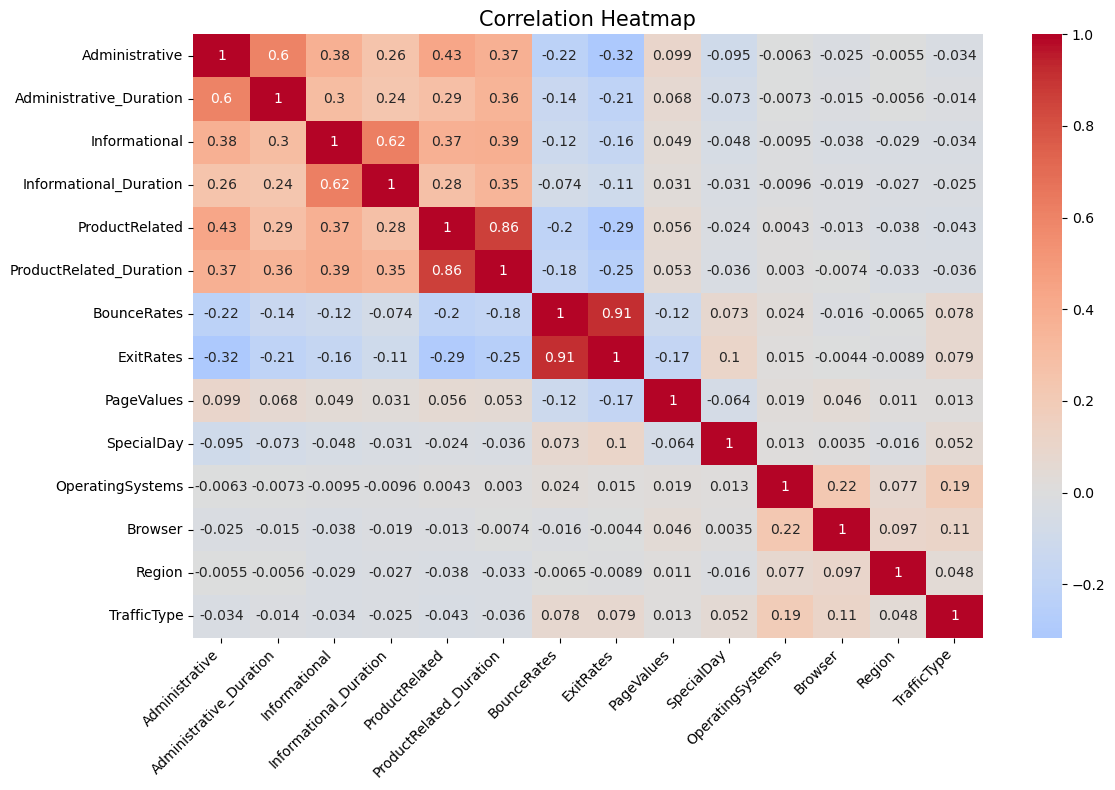

In [30]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data[numeric_columns]

# Create the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Univariate Analysis with Visualization
* Revenue
* Weekend
* Operating System
* Browser
* Month
* VistorType
* TrafficType
* Region

## Revenue

In [34]:
data['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

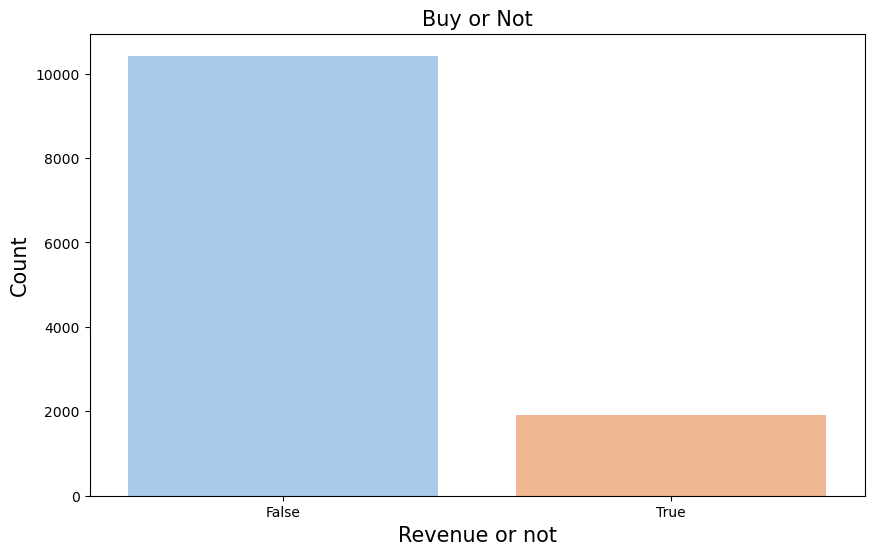

In [36]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (10, 6)

sns.countplot(x='Revenue', data=data, palette='pastel')
plt.title('Buy or Not', fontsize=15)
plt.xlabel('Revenue or not', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

## Weekend

In [39]:
data['Weekend'].value_counts()

Weekend
False    9462
True     2868
Name: count, dtype: int64

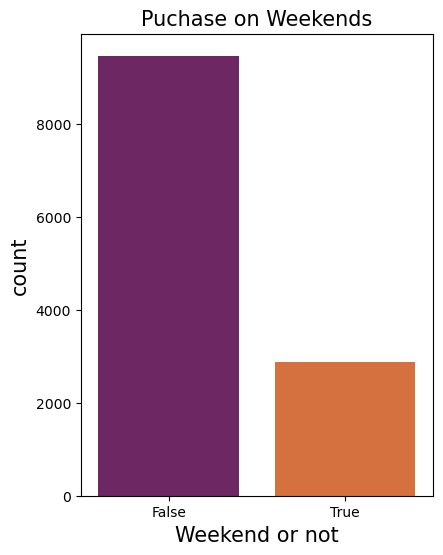

In [41]:
# checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (10,6)
plt.subplot(1, 2, 2)
sns.countplot(x='Weekend', data=data, palette = 'inferno')
plt.title('Puchase on Weekends', fontsize = 15)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

* The distribution of Revenue and Weekend data are hightly imbalanced.

## Operating System

In [45]:
# checking the no. of Os's is having
data['OperatingSystems'].value_counts()

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

In [47]:
# plotting a pie chart for Operating Systems

plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['violet', 'magenta', 'pink', 'blue']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Different Operating Systems', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

* Top 3 Operating Systems are covered 95% of this dataset, we should focus on them to increase our business.

## Browsers

In [51]:
# checking the no. of Browser is having
data['Browser'].value_counts()

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

In [53]:
# Ploting a pie chart for browsers
plt.rcParams['figure.figsize'] = (18, 7)

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1", "4", "5", "6", "10", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.1f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

* 90% users used only top 3 browser.

## Month

In [57]:
data['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

In [59]:
# creating a donut chart for the months variations
# plotting a pie chart for share of special days
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 15)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

## Visitor Type

In [62]:
data['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [64]:
# plotting a pie chart for Visitors

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

* More than 85% visitors are returning vistors, information may helpful for marketing.

## Traffic type

In [68]:
data['TrafficType'].value_counts()

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64

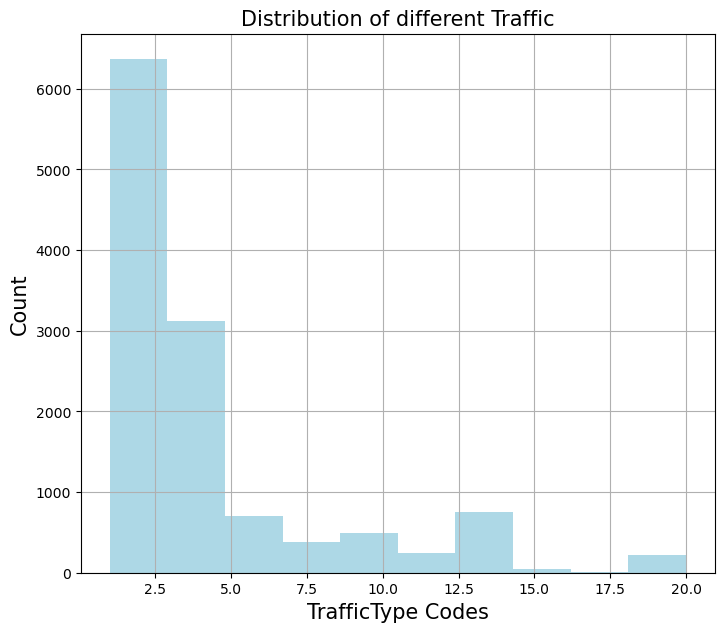

In [70]:
# visualizing the distribution of different traffic around the TrafficType
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['TrafficType'], color = 'lightblue')
plt.title('Distribution of different Traffic', fontsize = 15)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.grid()
plt.show()

## Region

In [73]:
data['Region'].value_counts()

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

In [75]:
# visualizing the distribution of the users around the Region
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['Region'], color = 'lightgreen')
plt.title('Distribution of users(Customers)', fontsize = 15)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

## Special Days

In [78]:
data['SpecialDay'].value_counts()

SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

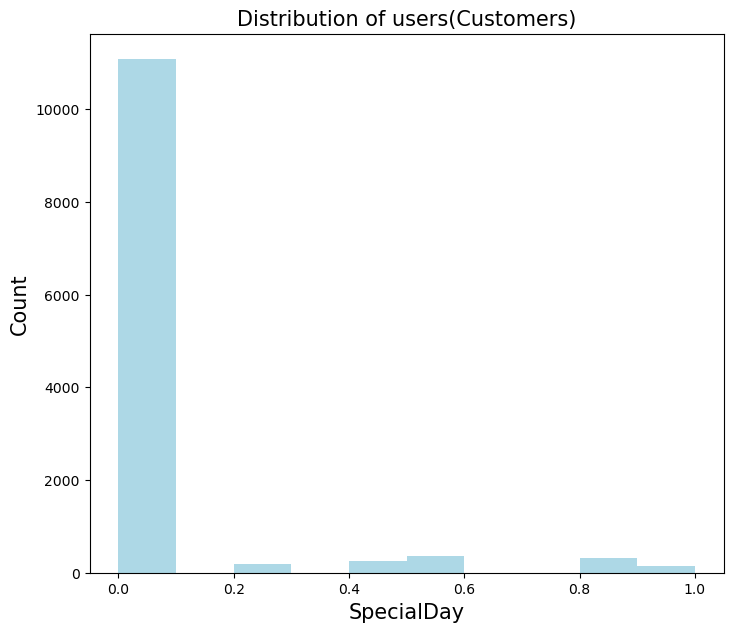

In [80]:
# visualizing the distribution of the users around the SpecialDay
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['SpecialDay'], color = 'lightblue')
plt.title('Distribution of users(Customers)', fontsize = 15)
plt.xlabel('SpecialDay', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

# Bi-Variate Analysis with Visualization¶
* Administrative duration vs revenue
* Informational duration vs revenue
* product related duration vs revenue
* exit rate vs revenue
* page values vs revenue
* bounce rates vs revenue
* weekend vs Revenue
* Traffic Type vs Revenue
* visitor type vs revenue
* region vs Revenue

## Administrative duration vs Revenue

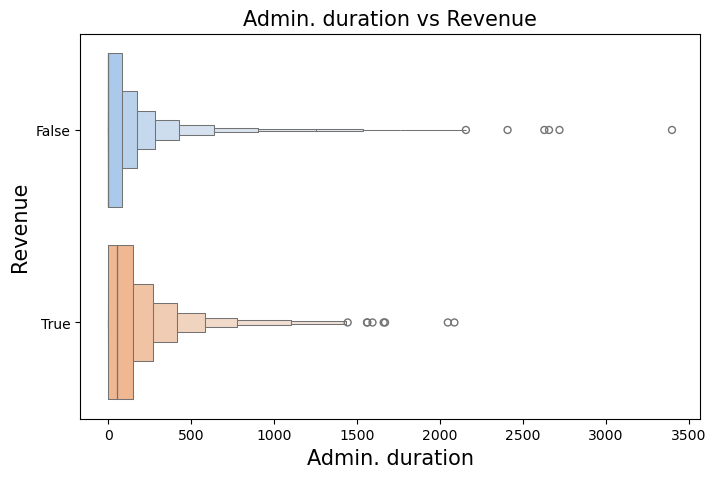

In [84]:
# boxenplot for Administrative duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data=data, x='Administrative_Duration', y='Revenue', palette='pastel', orient='h')
plt.title('Admin. duration vs Revenue', fontsize=15)
plt.xlabel('Admin. duration', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

## Informational duration vs Revenue

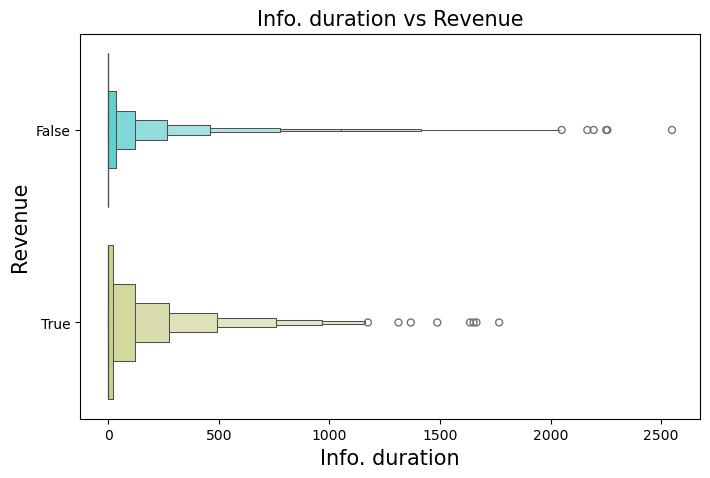

In [87]:
# boxenplot for Informational duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data=data, x='Informational_Duration', y='Revenue', palette='rainbow', orient='h')
plt.title('Info. duration vs Revenue', fontsize=15)
plt.xlabel('Info. duration', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

## Product Related Duration vs Revenue

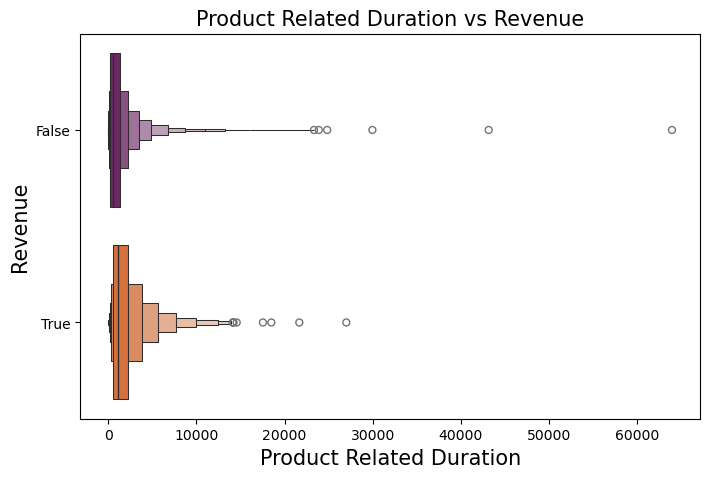

In [90]:
# boxen plot product related duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data=data, x='ProductRelated_Duration', y='Revenue', palette='inferno', orient='h')
plt.title('Product Related Duration vs Revenue', fontsize=15)
plt.xlabel('Product Related Duration', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

## Exit Rates vs Revenue

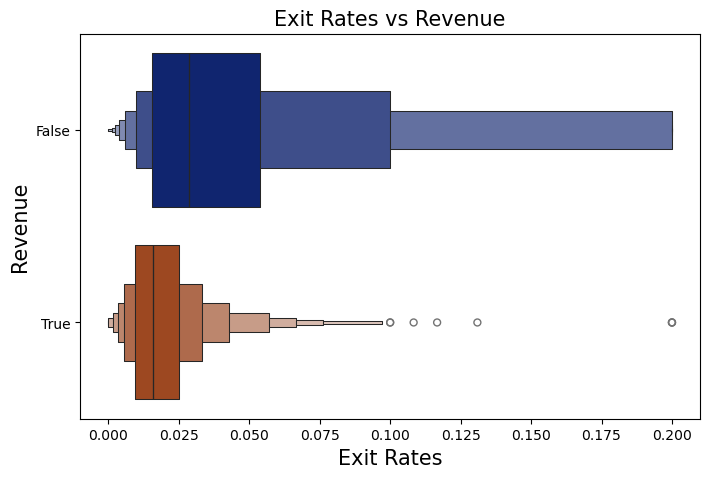

In [93]:
# boxenplot for exit rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data=data, x='ExitRates', y='Revenue', palette='dark', orient='h')
plt.title('Exit Rates vs Revenue', fontsize=15)
plt.xlabel('Exit Rates', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

## Page Values vs Revenue

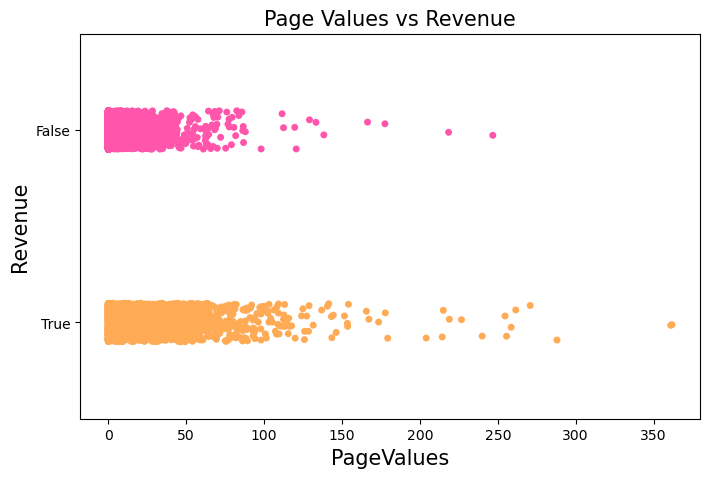

In [96]:
# strip plot for page values vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(data=data, x='PageValues', y='Revenue', palette='spring', orient='h')
plt.title('Page Values vs Revenue', fontsize=15)
plt.xlabel('PageValues', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

## Bounce Rates vs Revenue

In [99]:
# strip plot for bounce rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(data=data, x='BounceRates', y='Revenue', palette='autumn', orient='h')
plt.title('Bounce Rates vs Revenue', fontsize=15)
plt.xlabel('Bounce Rates', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

## Weekend vs Revenue

<Figure size 1500x500 with 0 Axes>

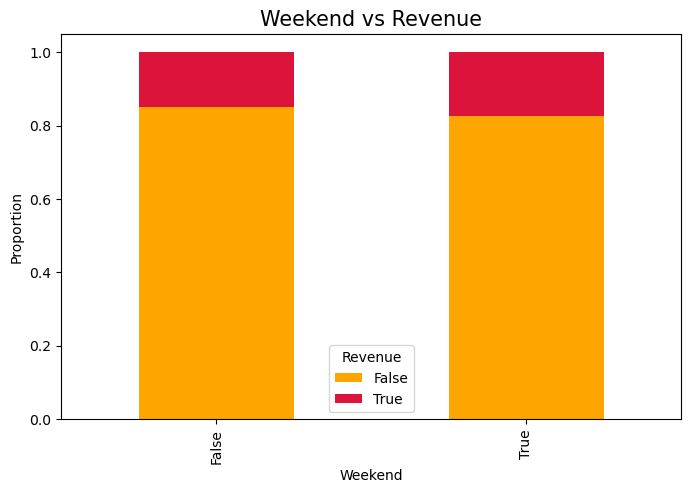

In [102]:
# bar plot for weekend vs Revenue
plt.figure(figsize=(15, 5))

df = pd.crosstab(data['Weekend'], data['Revenue'], normalize='index')
df.plot(kind='bar', stacked=True, color=['orange', 'crimson'])

plt.title('Weekend vs Revenue', fontsize=15)
plt.xlabel('Weekend')
plt.ylabel('Proportion')
plt.legend(title='Revenue')
plt.show()

## Traffic Type vs Revenue

<Figure size 1500x500 with 0 Axes>

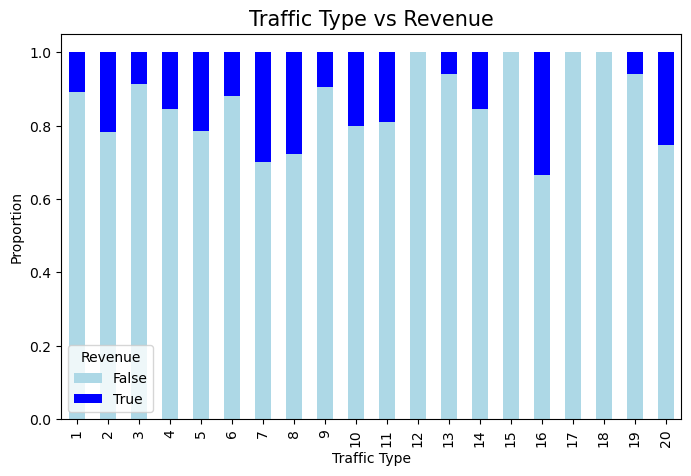

In [105]:
# bar plot for traffic type vs revenue
plt.figure(figsize=(15, 5))

df = pd.crosstab(data['TrafficType'], data['Revenue'], normalize='index')
df.plot(kind='bar', stacked=True, color=['lightblue', 'blue'])

plt.title('Traffic Type vs Revenue', fontsize=15)
plt.xlabel('Traffic Type')
plt.ylabel('Proportion')
plt.legend(title='Revenue')
plt.show()

## Visitor type vs revenue

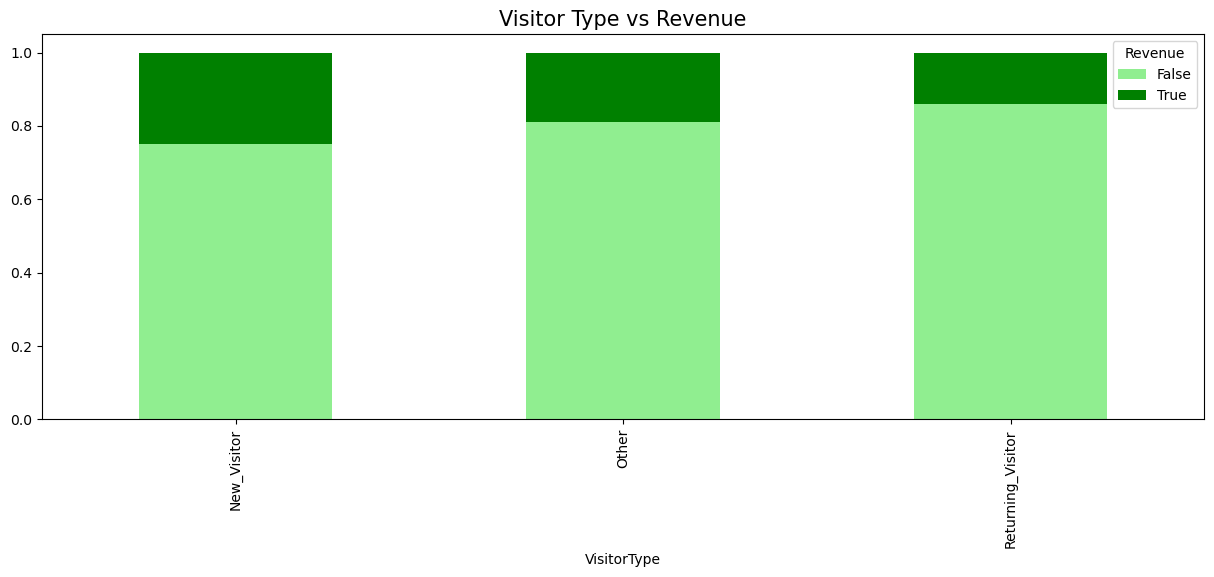

In [108]:
# bar plot for visitor type vs revenue
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize =(15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 15)
plt.show()

## Region vs Revenue

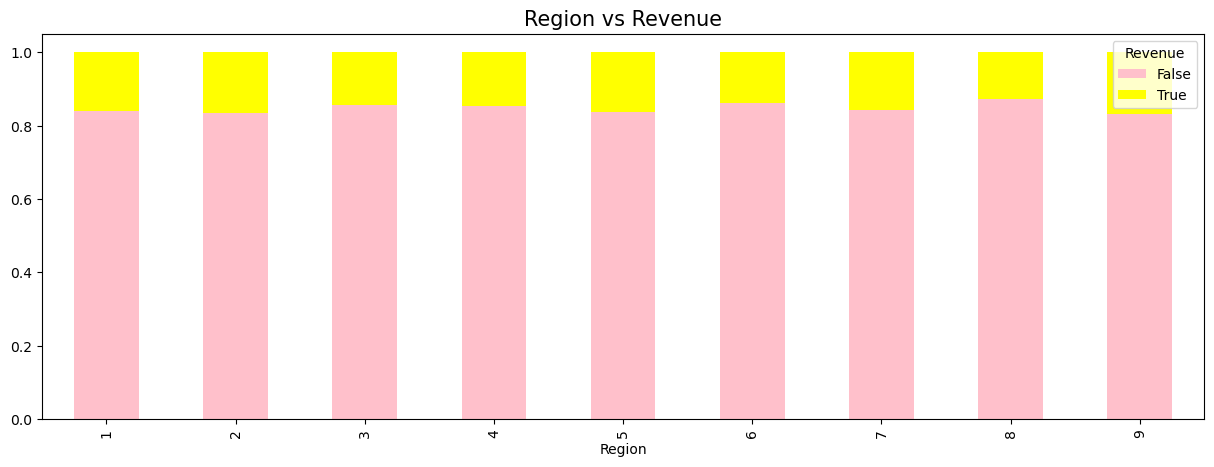

In [111]:
# bar plot for region vs revenue

df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['pink', 'yellow'])
plt.title('Region vs Revenue', fontsize = 15)
plt.show()

# Multi-variate Analysis
* month vs pagevalues w.r.t. revenue
* month vs exitrates w.r.t. revenue
* month vs bounceRates w.r.t. Revenue
* visitor type vs BounceRates w.r.t. revenue
* visitor type vs exit rates w.r.t. revenue
* exit rates vs pagevalue w.r.t. revenue
* region vs pagevalues w.r.t. revenue
* region vs exit rates w.r.t. revenue

## month vs pagevalues w.r.t. revenue

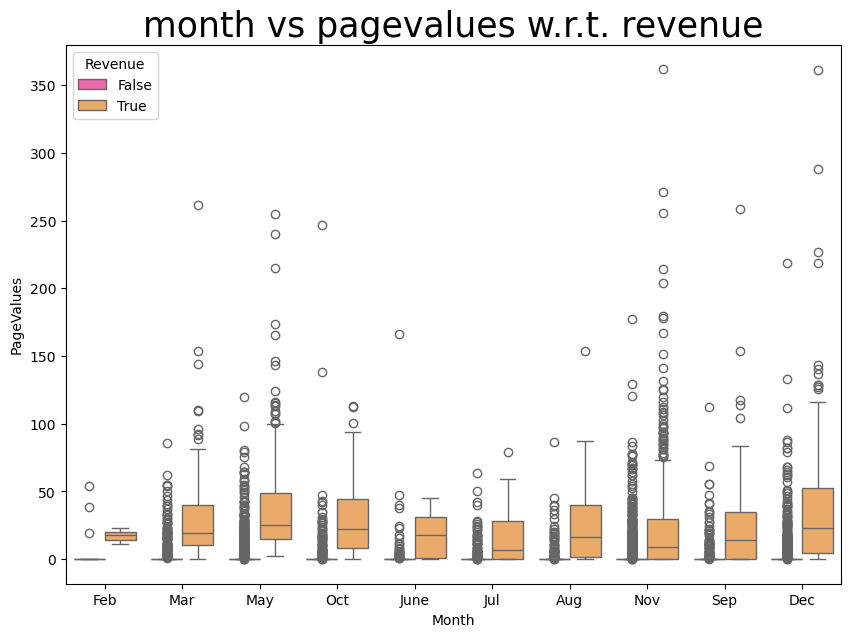

In [115]:
# boxplot for month vs pagevalues w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'spring')
plt.title('month vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()

## month vs exitrates w.r.t. revenue

In [118]:
# boxplot for month vs exitrates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'inferno')
plt.title('month vs exitrates w.r.t. revenue', fontsize = 25)
plt.show()

## month vs bounceRates w.r.t. Revenue

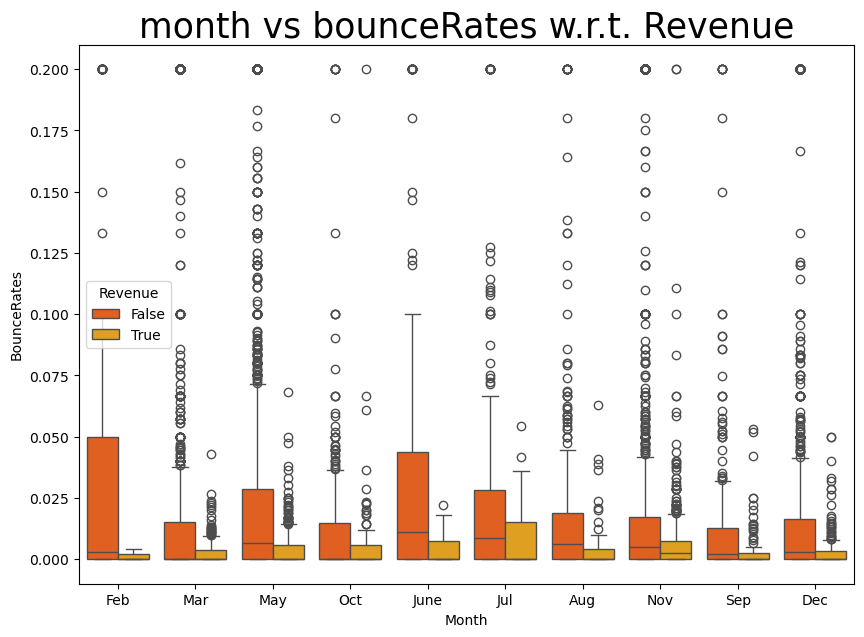

In [121]:
# boxplot for month vs bounceRates w.r.t. Revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'autumn')
plt.title("month vs bounceRates w.r.t. Revenue", fontsize = 25)
plt.show()

## VisitorType vs BounceRates w.r.t. revenue

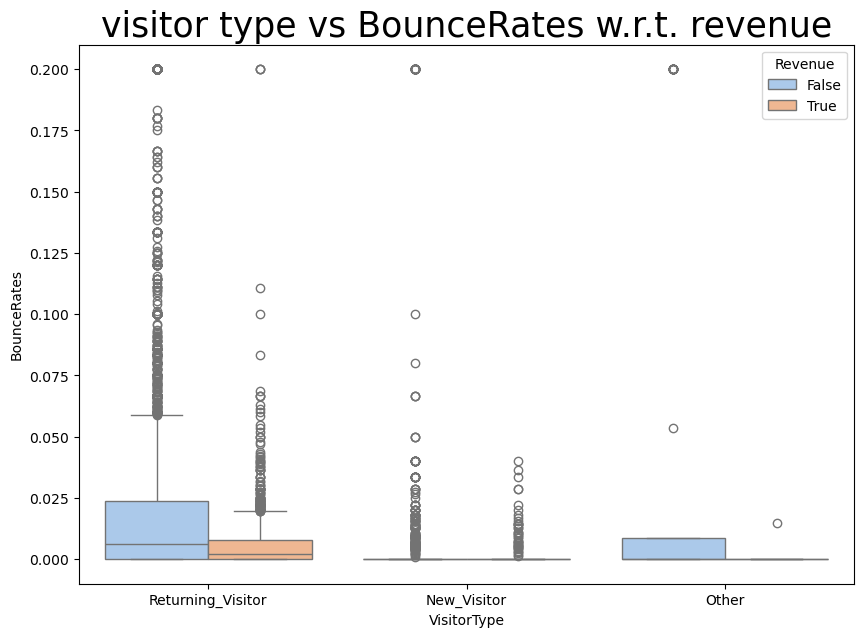

In [124]:
# boxplot for visitorType vs BounceRates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('visitor type vs BounceRates w.r.t. revenue', fontsize = 25)
plt.show()

## exit rates vs page value w.r.t. revenue

In [127]:
# violin plot for visitor type vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'Reds')
plt.title('exit rates vs page value w.r.t. revenue', fontsize = 25)
plt.show()

## visitor type vs exit rates w.r.t. revenue

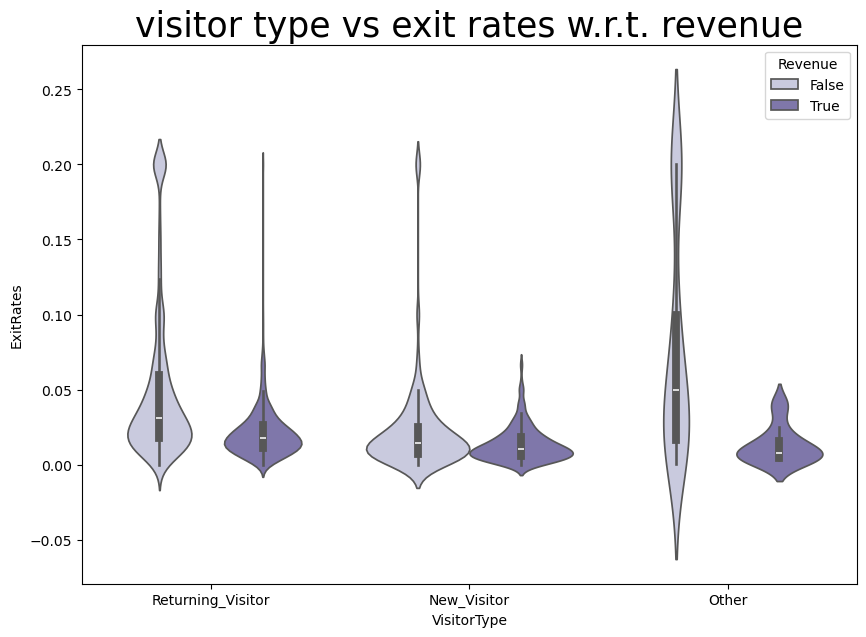

In [130]:
# violin plot for visitor type vs exit rates wrt revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Purples')
plt.title('visitor type vs exit rates w.r.t. revenue', fontsize = 25)
plt.show()

## region vs pagevalues w.r.t. revenue

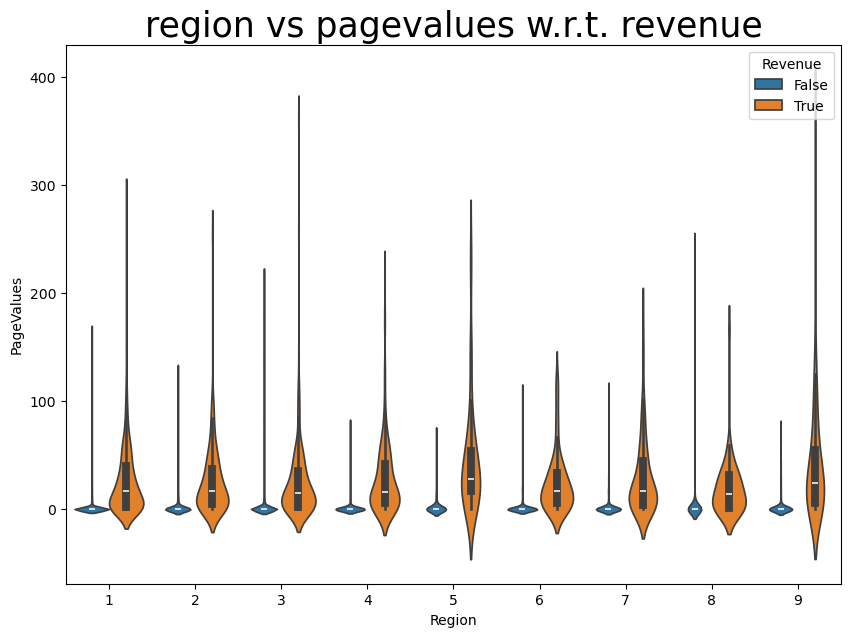

In [133]:
# violin plot for region vs pagevalues w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data ['Region'], y = data['PageValues'], hue = data['Revenue'])
plt.title('region vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()

## region vs exit rates w.r.t revenue

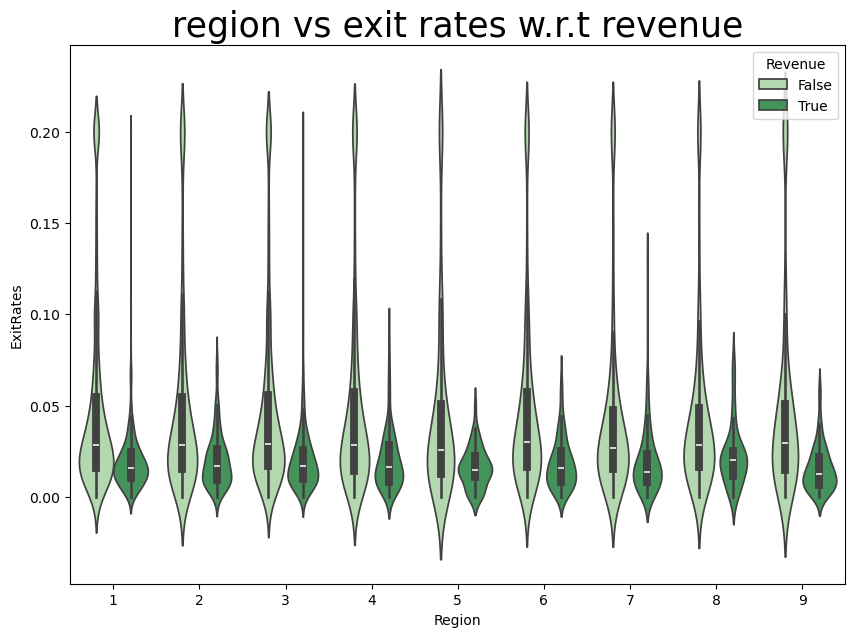

In [139]:
# violin plot for rigion vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.violinplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Greens')
plt.title("region vs exit rates w.r.t revenue", fontsize = 25)
plt.show()

## Summary table of multivariate Feature Analysis

In [142]:
multivariate_feature_analysis = [
    ['month vs pagevalues', 'Revenue', 'Gaussian', 'High', 'Low', 'Low', 'High'],
    ['month vs exitrates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'Medium'],
    ['month vs bounceRates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'High'],
    ['visitor type vs BounceRates' , 'Revenue', 'Exponential', 'Low', 'High', 'Low', 'High'],
    ['visitor type vs exit rates' , 'Revenue', 'Exponential', 'Low', 'High', 'High', 'Medium'],
    ['visitor type vs exit rates', 'Revenue', 'Exponential', 'High', 'Low', 'High', 'Medium'],
    ['region vs pagevalues', 'Revenue', 'Exponential', 'Low', 'High', 'High', 'High'],
    ['rigion vs exit rates', 'Revenue', 'Gaussian', 'High', 'High', 'High', 'Medium'] 
]
feature_summary = pd.DataFrame(multivariate_feature_analysis, columns=['Multivariate_features', 'W.R.T', 'Distribution', 'Revenue_True', 'Revenue_False', 'Outliers', 'Importance'])
feature_summary

Multivariate_features    W.R.T Distribution Revenue_True  \
0          month vs pagevalues  Revenue     Gaussian         High   
1           month vs exitrates  Revenue     Gaussian          Low   
2         month vs bounceRates  Revenue     Gaussian          Low   
3  visitor type vs BounceRates  Revenue  Exponential          Low   
4   visitor type vs exit rates  Revenue  Exponential          Low   
5   visitor type vs exit rates  Revenue  Exponential         High   
6         region vs pagevalues  Revenue  Exponential          Low   
7         rigion vs exit rates  Revenue     Gaussian         High   

  Revenue_False Outliers Importance  
0           Low      Low       High  
1          High   Medium     Medium  
2          High   Medium       High  
3          High      Low       High  
4          High     High     Medium  
5           Low     High     Medium  
6          High     High       High  
7          High     High     Medium

# Outliers

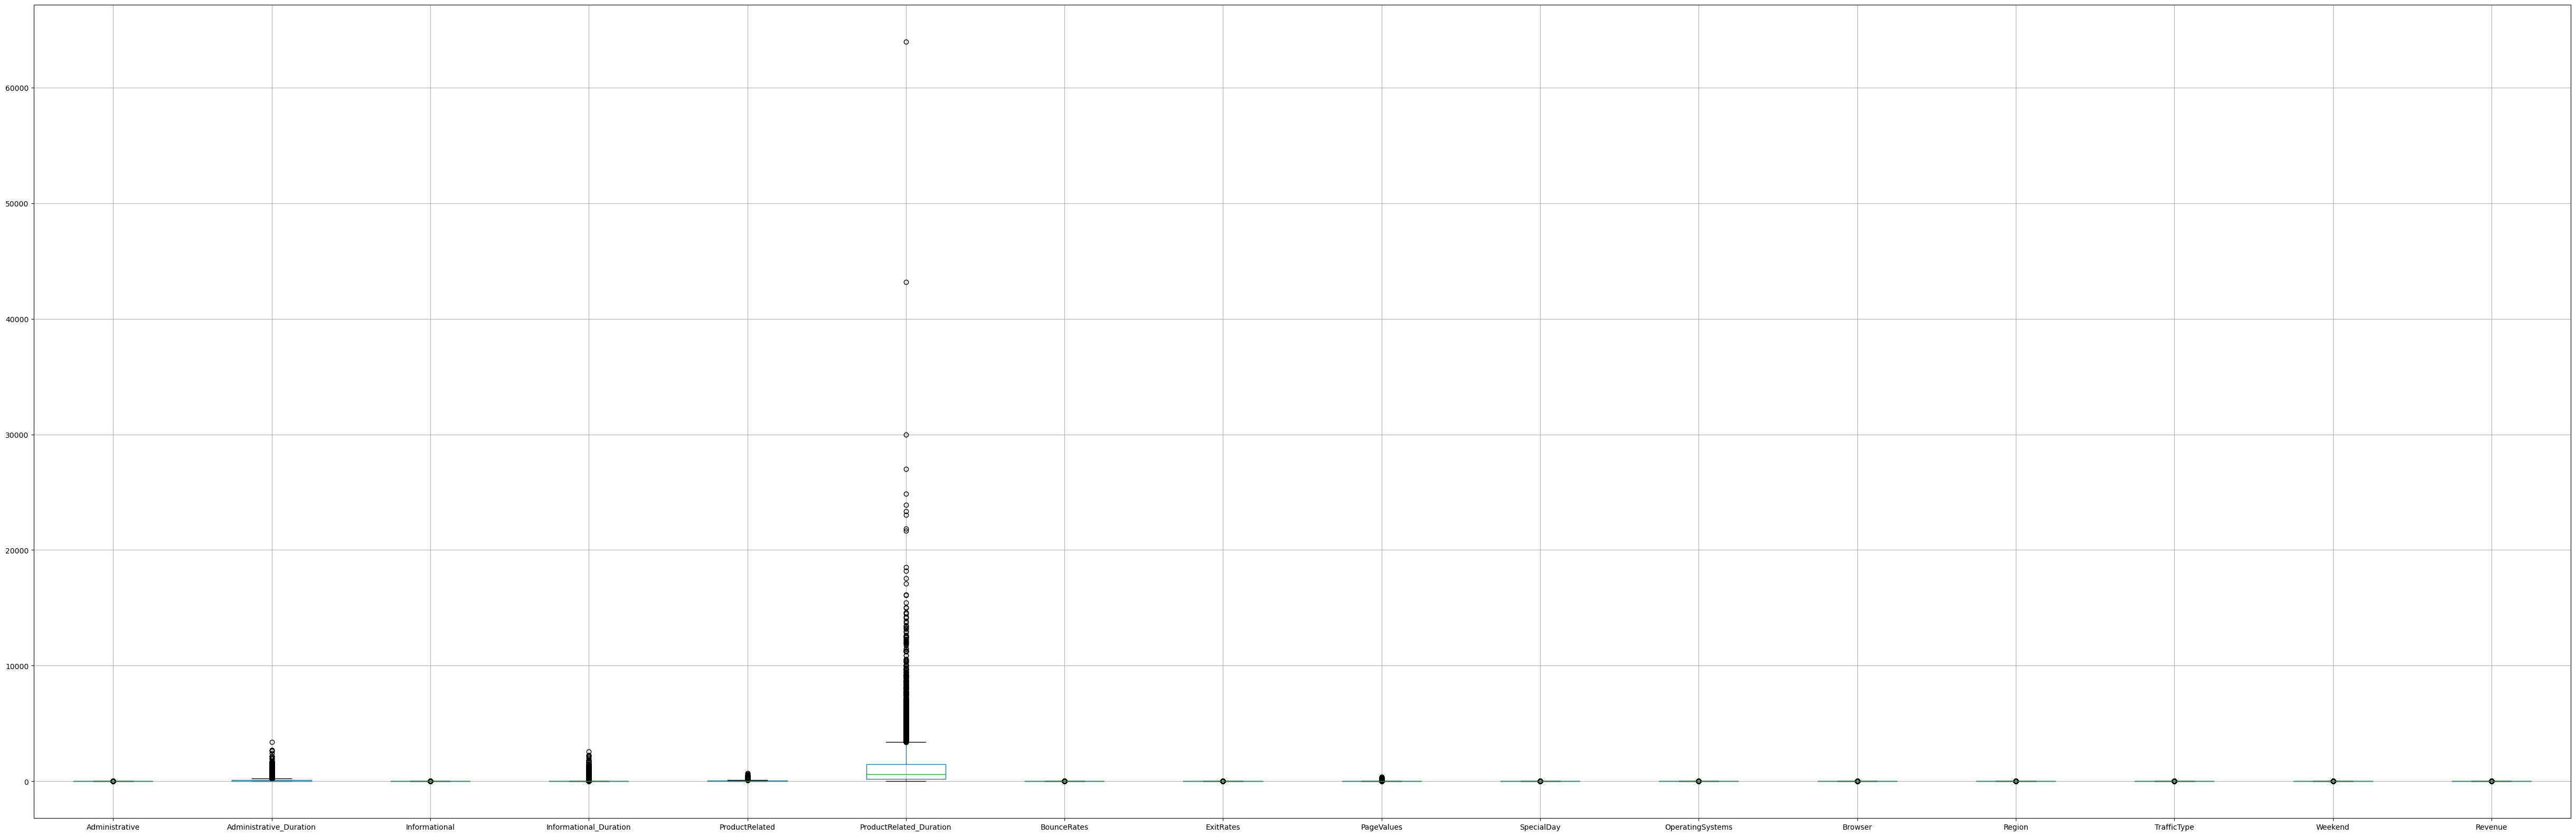

In [145]:
plt.figure(figsize=(62, 20))
data.boxplot();

## Numerical coloumns vs Target

In [148]:
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']

In [150]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in numerical_columns:
    data_mean, data_std = mean(data[i]), std(data[i])
    
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i, ': \n')

    # identify outliers
    outliers = [x for x in data[i] if x < lower or x > upper]
    
    num_out = len(outliers)
    print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in data[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)

Administrative_Duration : 

Identified outliers: 232
Non-outlier observations: 12098
Percent of outliers: 1.8815896188158963 

Informational_Duration : 

Identified outliers: 230
Non-outlier observations: 12100
Percent of outliers: 1.8653690186536902 

ProductRelated_Duration : 

Identified outliers: 219
Non-outlier observations: 12111
Percent of outliers: 1.7761557177615572 

BounceRates : 

Identified outliers: 708
Non-outlier observations: 11622
Percent of outliers: 5.742092457420925 

ExitRates : 

Identified outliers: 713
Non-outlier observations: 11617
Percent of outliers: 5.78264395782644 

PageValues : 

Identified outliers: 259
Non-outlier observations: 12071
Percent of outliers: 2.1005677210056772 



In [152]:
Outliers = pd.DataFrame({'Feature': numerical_columns, '% Of Outliers': out_per})
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending = False)
outlier_sorted

Feature  % Of Outliers
4                ExitRates       5.782644
3              BounceRates       5.742092
5               PageValues       2.100568
0  Administrative_Duration       1.881590
1   Informational_Duration       1.865369
2  ProductRelated_Duration       1.776156

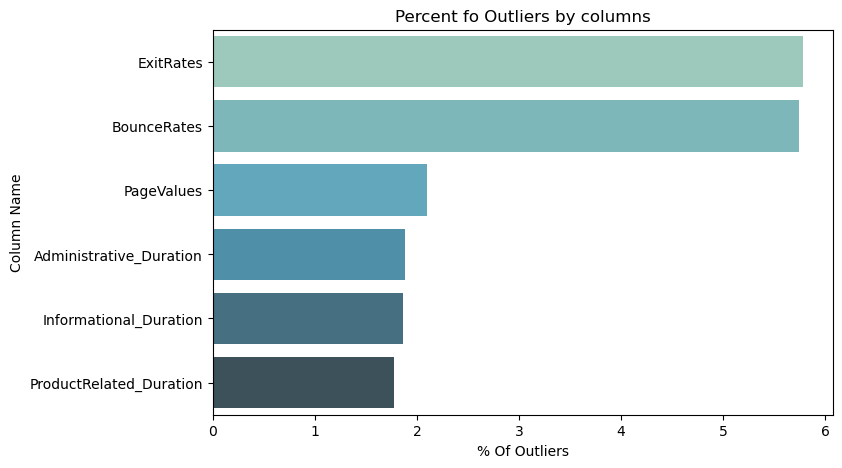

In [154]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'], palette = 'GnBu_d')
plt.title('Percent fo Outliers by columns')
plt.ylabel('Column Name')
plt.show()

# Clustering Analysis

Trying to learn the user characteristics of in terms of time spent on the Website

* Administrative Duration vs Bounce Rate
* Informative Duration vs Bounce Rates
* Administrative Duration vs Exit Rates

## Where from the Users of the Website come?

* Region vs Traffic Type
* Adminstrative Duration vs Region

In [157]:
# Imputing Missing Values with 0
data.fillna(0, inplace = True)

#checking the no. of null values after imputing
data.isnull().sum().sum()

0

## Administrative Duration vs Bounce Rates

In [160]:
# Time spent by the Users on website vs Bounce Rates
# let's cluster Administrative duration and bounce Rates to different types of clusters in the dataset.
# preparing the dataset
x = data.iloc[:, [1, 6]].values

# checking the shape of the dataset
print("Shape of the dataset: ", x.shape)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

Shape of the dataset:  (12330, 2)


# Visualizing the Cluster using scatter plot

In [163]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.title('Administrative Duration vs BounceRates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()


## Informational Duration vs Bounce Rates

In [166]:
# cluster anaysis of Informational Duration vs Bounce Rates
x = data.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

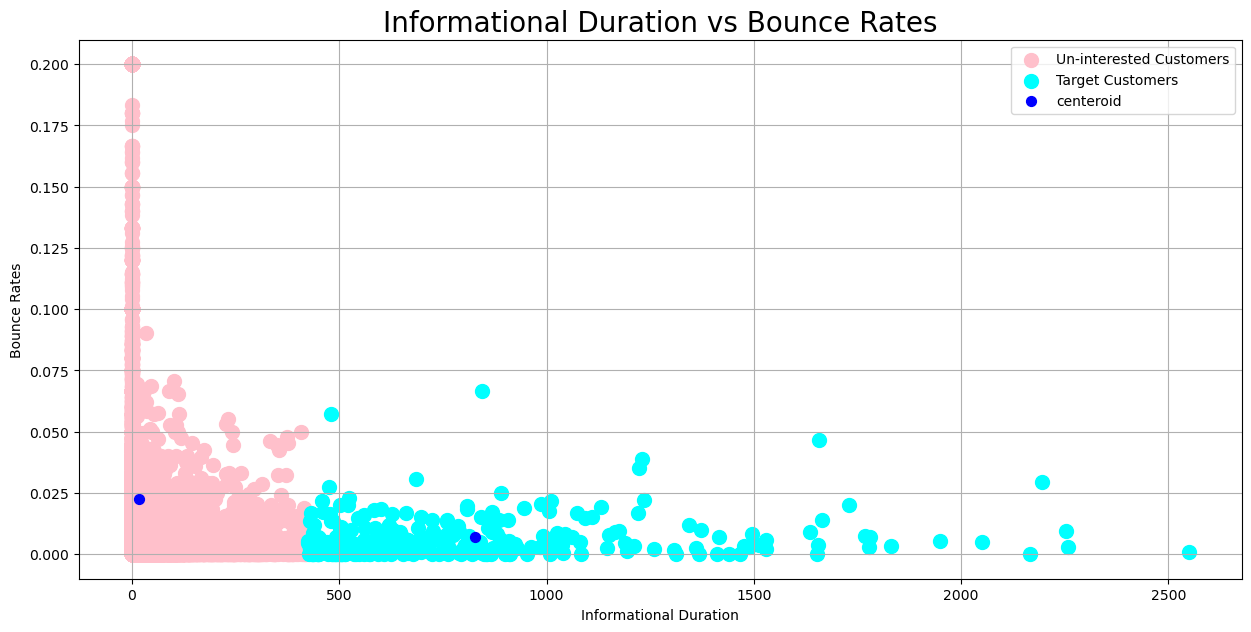

In [167]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

## Administrative Duration vs Exit Rates

In [171]:
# informational duration vs Bounce Rates
x = data.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

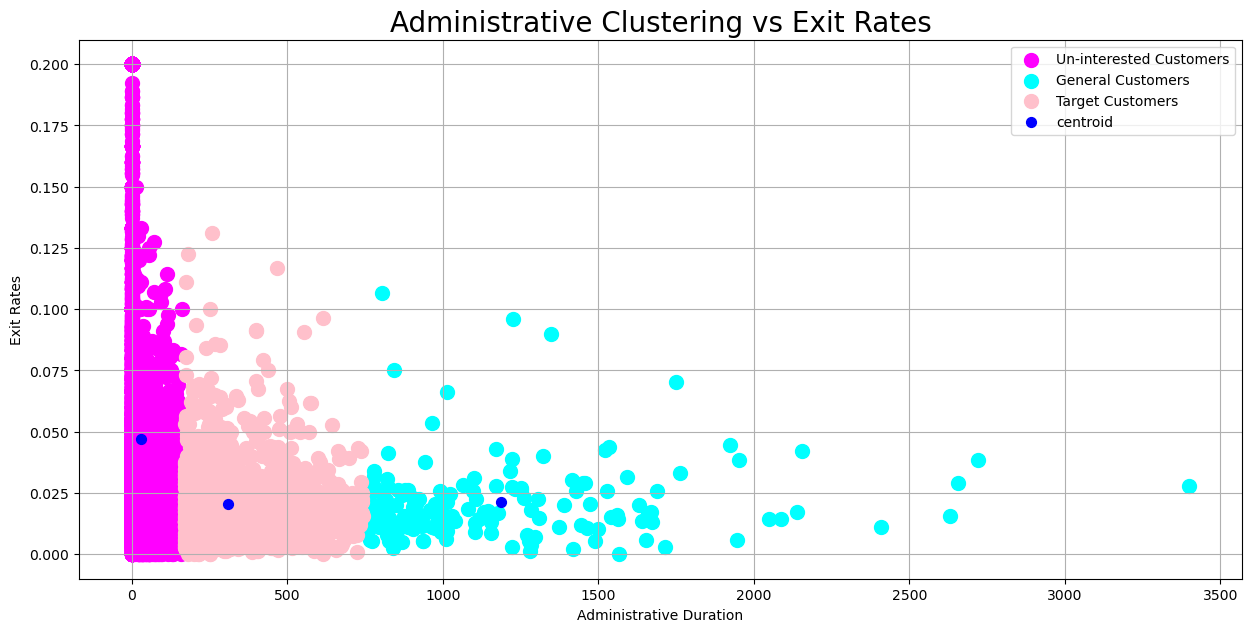

In [173]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'magenta', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

## Region vs Traffic Type

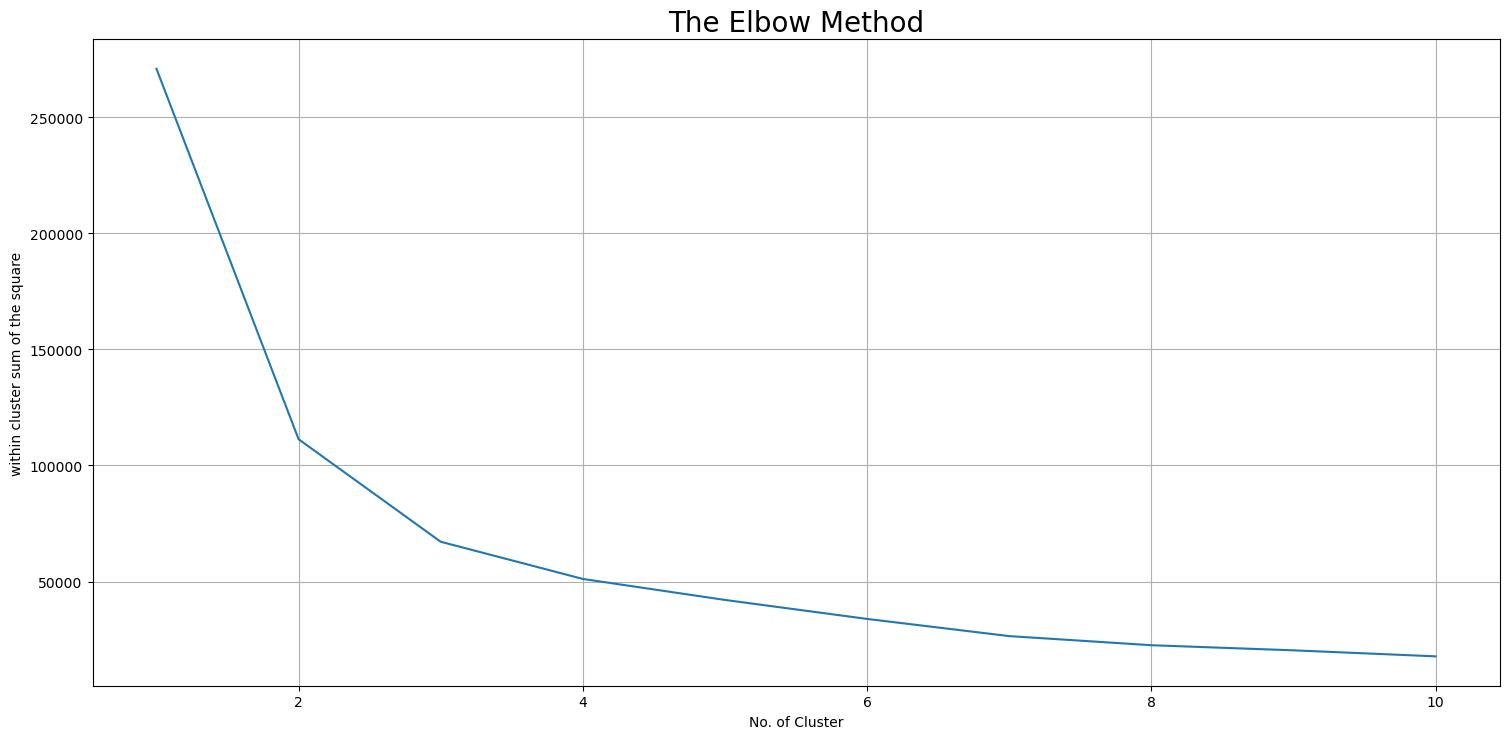

In [176]:
# Region vs TrafficType clustering
x = data.iloc[:, [13, 14]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Cluster')
plt.ylabel('within cluster sum of the square')
plt.show()

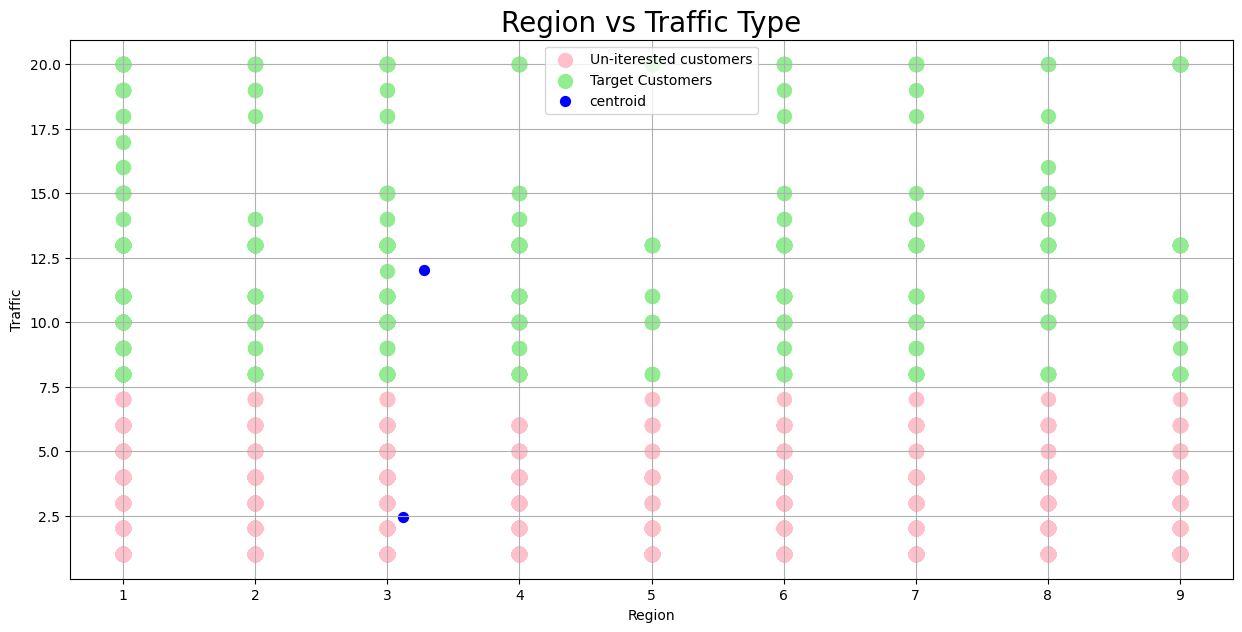

In [177]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-iterested customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'lightgreen', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centroid')

plt.title('Region vs Traffic Type', fontsize = 20)
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.grid()
plt.show()

## Administrative Duration vs Region

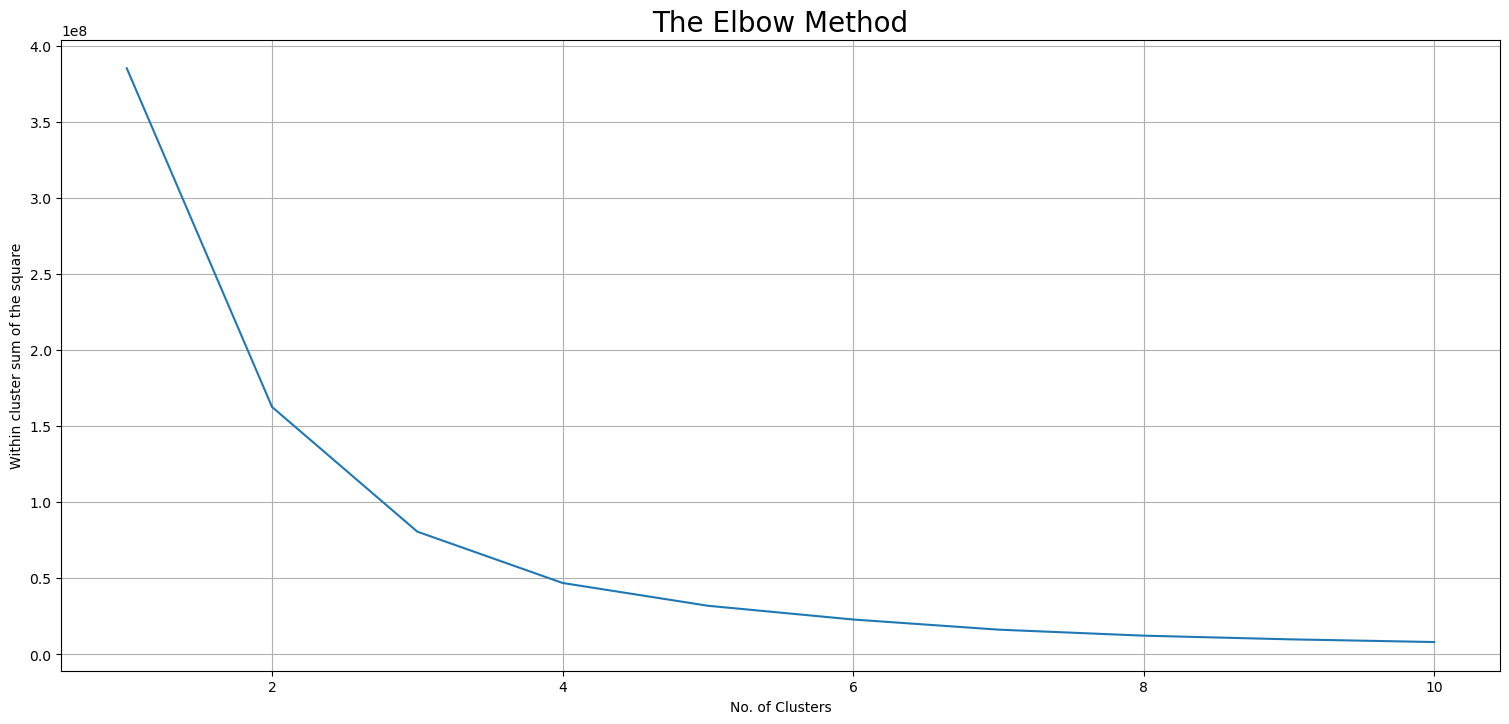

In [181]:
# administrative duration vs bounce rates
x = data.iloc[:, [1, 13]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Within cluster sum of the square')
plt.show()

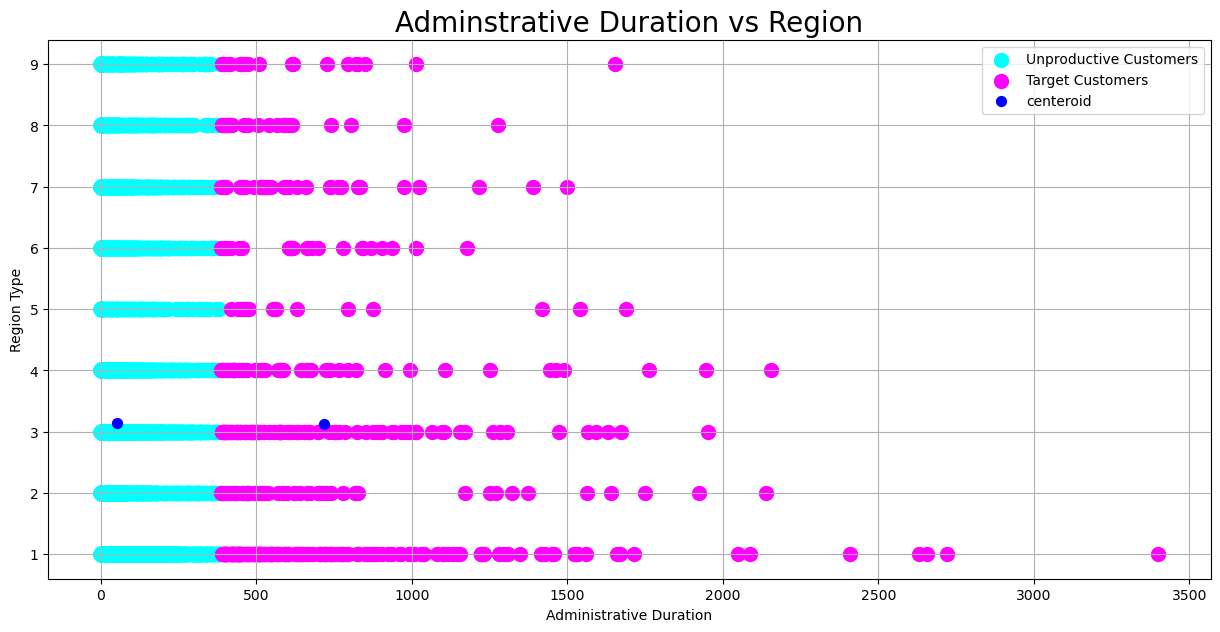

In [183]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'cyan', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()

# Data Preprocessing

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [188]:
# one hot encoding
df1 = pd.get_dummies(data)
df1.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0         0.20       0.20         0.0         0.0  ...      False       False   
1         0.00       0.10         0.0         0.0  ...      False       False   
2         0.20       0.20         0.0         0.0  ...      False       False   
3         0.05       0.14         0.0         0.0  ...      False       False   
4         0.02       0.05         0.0         0.0  ...      False       False   

   Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  \
0      False      False      False      False      False   
1      False      False      False      False      False   
2      False      False      False      False      False   
3      False      False      False      False      False   
4      False      False      False      False      False   

   VisitorType_New_Visitor  VisitorType_Other  VisitorType_Returning_Visitor  
0                    False              False                           True  
1                    False              False                           True  
2                    False              False                           True  
3                    False              False                           True  
4                    False              False                           True  

[5 rows x 29 columns]

In [190]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [192]:
# Label encoding of revenue
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Revenue'] = le.fit_transform(df1['Revenue'])
df1['Revenue'].value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

In [194]:
df1['Weekend'].value_counts()

Weekend
False    9462
True     2868
Name: count, dtype: int64

In [196]:
# Label encoding of weekend

df1['Weekend'] = le.fit_transform(df1['Weekend'])
df1['Weekend'].value_counts()

Weekend
0    9462
1    2868
Name: count, dtype: int64

In [198]:
# Splitting dependent and independent variables(columns)
y = df1['Revenue']
x = df1.drop(['Revenue'], axis = 1)

# checking the shapes
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (12330, 28)
Shape of y:  (12330,)


In [200]:
# Splitting of the Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9864, 28)
Shape of y_train : (9864,)
Shape of x_test : (2466, 28)
Shape of y_test : (2466,)


# Modelling : Support Vector Machine

In [203]:
# model define and training
model = svm.SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.8514801297648013
Testing Accuracy:  0.8317112733171127


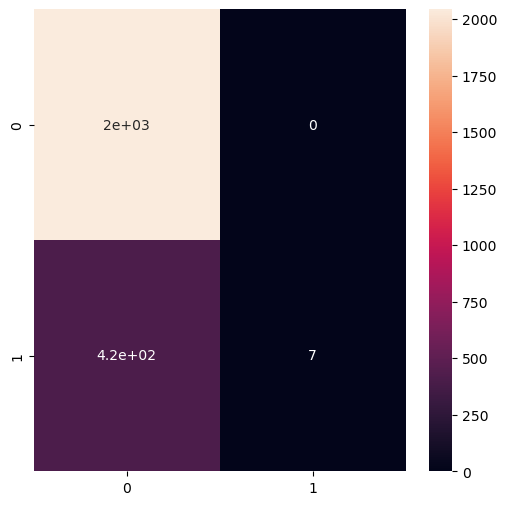

In [207]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [209]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2044
           1       1.00      0.02      0.03       422

    accuracy                           0.83      2466
   macro avg       0.92      0.51      0.47      2466
weighted avg       0.86      0.83      0.76      2466



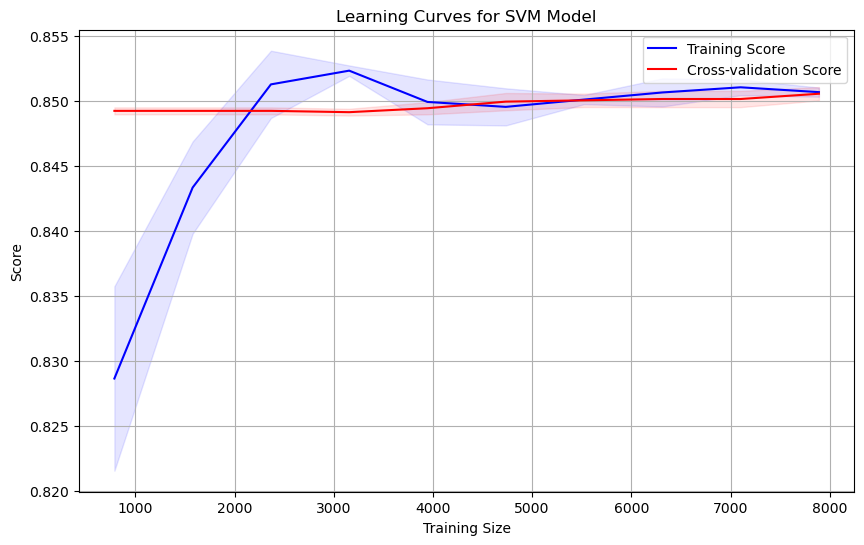

In [211]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, x_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation Score', color='red')

# Add standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves for SVM Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Modelling: Naive Bayes

In [214]:
# model define and training
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.7982562854825629
Testing Accuracy:  0.7899432278994323


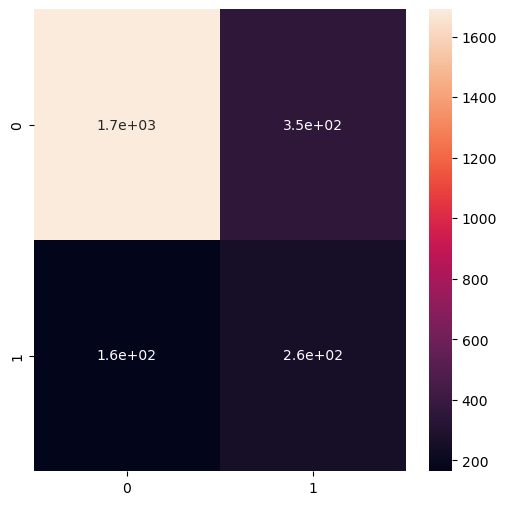

In [216]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [218]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2044
           1       0.42      0.61      0.50       422

    accuracy                           0.79      2466
   macro avg       0.67      0.72      0.68      2466
weighted avg       0.83      0.79      0.80      2466



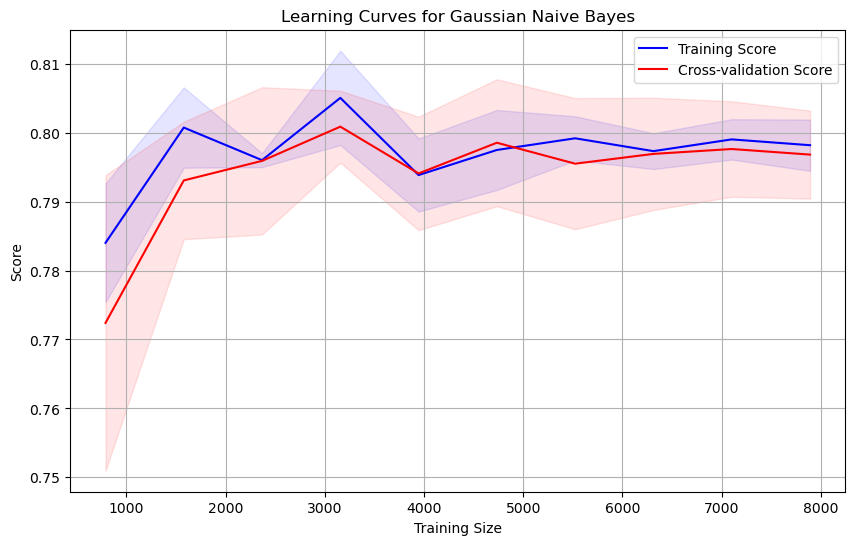

In [220]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    GaussianNB(), x_train, y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation Score', color='red')

# Add standard deviation bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves for Gaussian Naive Bayes')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Summary Table based on Two Supervised Learning Algorithm

In [223]:
precision = ['Naive Bayes', 'precision', 0.91, 0.42]
recall = ['Naive Bayes', 'recall', 0.83, 0.61]
f1_score = ['Naive Bayes', 'f1_score', 0.87, 0.50 ]
precision2 = ['Support Vector Machine', 'precision', 0.83, 0.00 ]
recall2 = ['Support Vector Machine', 'recall', 1.0, 0.00 ]
f1_score2 = ['Support Vector Machine', 'f1_score', 0.91, 0.00 ]
table = pd.DataFrame([precision, precision2, recall, recall2, f1_score, f1_score2])
table.columns = ['model_name', 'metrics', 'Is_Revenue(False)', 'Is_Revenue(True)']
table

model_name    metrics  Is_Revenue(False)  Is_Revenue(True)
0             Naive Bayes  precision               0.91              0.42
1  Support Vector Machine  precision               0.83              0.00
2             Naive Bayes     recall               0.83              0.61
3  Support Vector Machine     recall               1.00              0.00
4             Naive Bayes   f1_score               0.87              0.50
5  Support Vector Machine   f1_score               0.91              0.00

# Modelling K-Means clustering

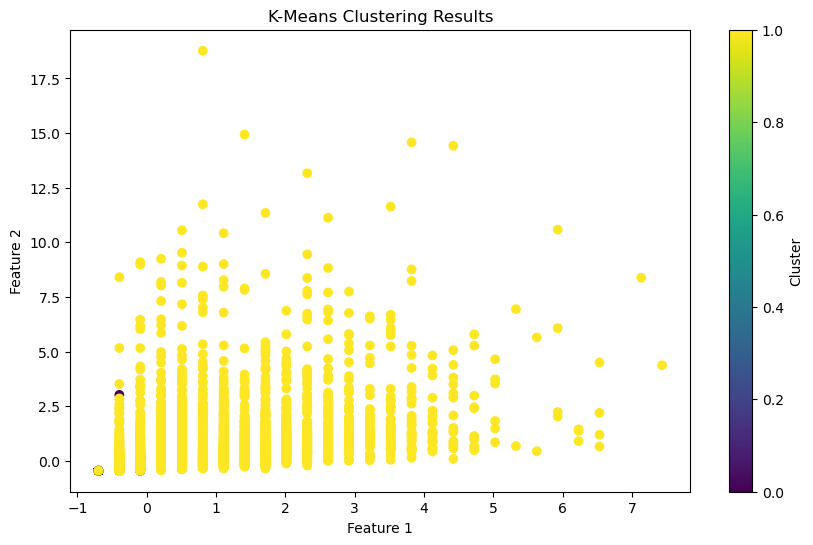

In [226]:
# Select numeric features
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [228]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert boolean Revenue to numeric (0,1)
true_labels = data['Revenue'].astype(int)

# Calculate metrics
precision = precision_score(true_labels, clusters)
recall = recall_score(true_labels, clusters)
f1 = f1_score(true_labels, clusters)

print(f"Precision Score: {precision:.3f}")
print(f"Recall Score: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Precision Score: 0.170
Recall Score: 0.997
F1 Score: 0.290


# Modelling Hierarchical Clustering

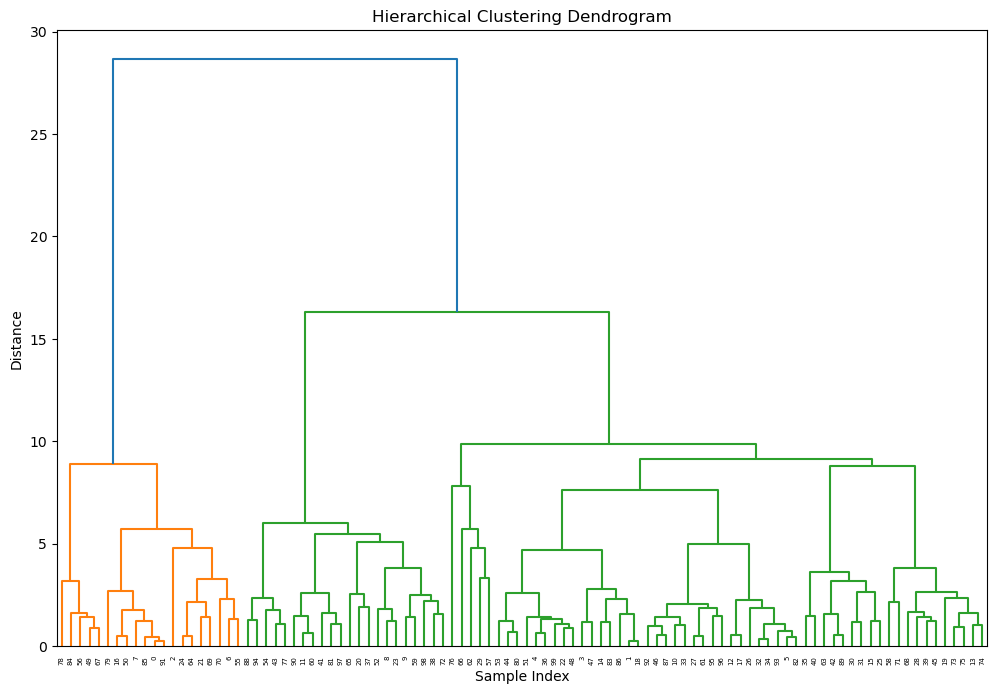

Cluster Distribution:
KMeans_Cluster  Hierarchical_Cluster  Actual_Revenue
1               0                     False             9305
                                      True              1902
0               1                     False              771
                0                     False              333
1               1                     False               13
0               0                     True                 3
                1                     True                 3
Name: count, dtype: int64


In [231]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hier_clusters = hierarchical.fit_predict(X_scaled)

# Create dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate linkage matrix
linkage_matrix = linkage(X_scaled[:100], method='ward')  # Using first 100 samples for visualization

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Compare results
comparison_df = pd.DataFrame({
    'KMeans_Cluster': clusters,
    'Hierarchical_Cluster': hier_clusters,
    'Actual_Revenue': data['Revenue']
})

print("Cluster Distribution:")
print(comparison_df.value_counts())

In [233]:
# Convert boolean Revenue to numeric (0,1)
true_labels = data['Revenue'].astype(int)

# Calculate metrics for hierarchical clustering
precision = precision_score(true_labels, hier_clusters)
recall = recall_score(true_labels, hier_clusters)
f1 = f1_score(true_labels, hier_clusters)

# Check if labels need to be inverted (since clustering can flip labels)
if f1_score(true_labels, hier_clusters) < f1_score(true_labels, 1-hier_clusters):
    hier_clusters = 1 - hier_clusters
    precision = precision_score(true_labels, hier_clusters)
    recall = recall_score(true_labels, hier_clusters)
    f1 = f1_score(true_labels, hier_clusters)

print("Hierarchical Clustering Metrics:")
print(f"Precision Score: {precision:.3f}")
print(f"Recall Score: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Hierarchical Clustering Metrics:
Precision Score: 0.165
Recall Score: 0.998
F1 Score: 0.283


In [235]:
metrics_data = {
    'Algorithm': ['K-Means', 'Hierarchical'],
    'Precision': [0.170, 0.165],
    'Recall': [0.997, 0.998],
    'F1 Score': [0.290, 0.283]
}

metrics_df = pd.DataFrame(metrics_data)

display(metrics_df.style.format({
    'Precision': '{:.3f}',
    'Recall': '{:.3f}',
    'F1 Score': '{:.3f}'
}).set_caption('Clustering Algorithms Performance Comparison'))

Above four models shows different type of accuracy. Though support vector machine gave us more accuracy we would choose naive bayes algorithm. Because, we see in the heatmap of confusion matrix that provide us important information which is support vector machine doesn't recognize any 'false-negative'. It means support vector machine doesn't give us a any good solution.